切断関数$T$を掛けた場合の導出。非常に複雑になるので、変数名のつけかたに注意する。

In [12]:
from sympy import *

# おまじない
init_printing()

R_i = Matrix(3,1,symbols('x_i,y_i,z_i'))
R_j = Matrix(3,1,symbols('x_j,y_j,z_j'))
R_k = Matrix(3,1,symbols('x_k,y_k,z_k'))


In [11]:
h_3 = Function('h_3')

In [26]:
R_ij = R_j - R_i
R_ik = R_k - R_i
r_ij, r_ik = symbols('r_ij r_ik')


$h_3$の引数には角度が含まれるものの、角度も結局はベクトルから計算されるので、実質的には2つのベクトルの関数とみなして良い。また、Stillinger-Weberポテンシャルの場合には、式の中で$\cos \theta$の形でしかでてこないので、実質上はθを使わなくていい。

S-Wで面倒なのは、むしろ$h_3$の微分。でもこれは`sympy`にまかせてしまえる。

In [17]:
L, G, A = symbols('L G A')
H3 = L*exp((G/(r_ij-A))+(G/(r_ik-A)))*((R_ij.T*R_ik)[0]/(r_ij*r_ik)*3+1)/3

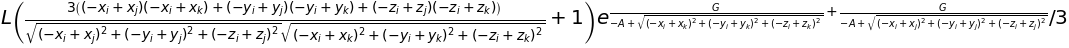

In [18]:
H3

`r_ij`に関する部分と、`R_ij`がでてくる部分を分離したいね。

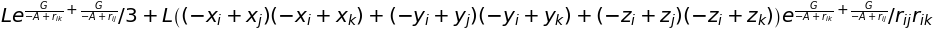

In [28]:
H_a = exp((G/(r_ij-A))+(G/(r_ik-A)))
H_b = (R_ij.T*R_ik)[0] #ベクトルの要素が関わる部分
H_c = H_a / (r_ij*r_ik)
L*H_c*H_b+L*H_a/3

In [71]:
# 一階微分を書いてみる。
r_2ij = (R_ij.T*R_ij)[0]
R_ji = R_i - R_j
r_2ij2 = (R_ji.T*R_ji)[0]

# r_ijを介した微分
def diffr(f,x):
    return diff(sqrt(r_2ij),x)*diff(f,r_ij)

# r_ijを介した二階微分
def diffr2(f,x,y):
    return diff(sqrt(r_2ij),x,y)*diff(f,r_ij)+diff(sqrt(r_2ij),x)*diff(sqrt(r_2ij),y)*diff(f,r_ij,r_ij)

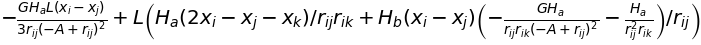

In [72]:
# 中心分子、同じ変数
D = L*(diffr(H_c,R_i[0])*H_b + H_c*diff(H_b, R_i[0])) + L/3*diffr(H_a, R_i[0])
D = D.subs(sqrt(r_2ij), r_ij)
D = D.subs(H_b, 'H_b')
D = D.subs(H_a, 'H_a')
dxi = D
D

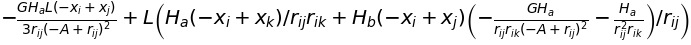

In [52]:
# 中心でない分子での微分は?
D = L*(diffr(H_c,R_j[0])*H_b + H_c*diff(H_b, R_j[0])) + L/3*diffr(H_a, R_j[0])
D = D.subs(sqrt(r_2ij), r_ij)
D = D.subs(sqrt(r_2ij2), r_ij)
D = D.subs(H_b, 'H_b')
D = D.subs(H_a, 'H_a')
dxj = D
D


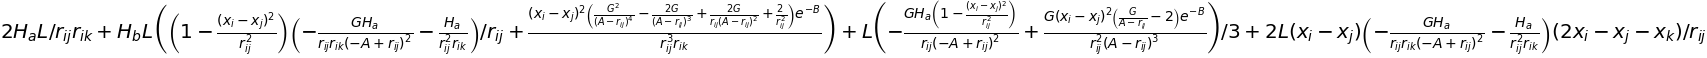

In [74]:
# 二階微分。中心分子、同一変数で二階。
B = Symbol('B')

D1 = L*(diffr2(H_c,R_i[0],R_i[0])*H_b)
D2 = L*(diffr(H_c,R_i[0])*diff(H_b, R_i[0]))
D3 = L*(diffr(H_c,R_i[0])*diff(H_b, R_i[0]))
D4 = L*H_c*diff(H_b, R_i[0], R_i[0])
D5 = L/3*diffr2(H_a, R_i[0], R_i[0])
D = D1+D2+D3+D4+D5
D = D.subs(sqrt(r_2ij2), r_ij)
D = D.subs(sqrt(r_2ij), r_ij)
D = D.subs(H_b, 'H_b')
D = D.subs(H_a, 'H_a')
# D = D.subs(exp(-G*(1/(A-r_ik)+1/(A-r_ij))), '(1/H_a)')
D = D.subs(G*(1/(A-r_ik)+1/(A-r_ij)), B)
dxixi = D
D

ほかの変数での微分もすべて同じ書き方で生成できるので省略する。
* 中心中心ii
  * 同じ軸
  * 異なる軸
* 中心周辺ij
  * 同じ軸
  * 異なる軸
* 周辺周辺jj
  * 同じ軸
  * 異なる軸
* 周辺周辺jk
  * 同じ軸
  * 異なる軸

の8種類の相互作用がある。

In [85]:
from sympy.utilities.codegen import codegen
result = codegen([('dxixi', dxixi)],
                 prefix='Deriv3',
                 language='f95',
                 project='NMA',
                 to_files=False)
print(result[0][1])

!******************************************************************************
!*                       Code generated with sympy 1.3                        *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                         This file is part of 'NMA'                         *
!******************************************************************************

REAL*8 function dxixi(A, B, G, H_a, H_b, L, r_ij, r_ik, x_i, x_j, x_k, y_i, &
      y_j, y_k)
implicit none
REAL*8, intent(in) :: A
REAL*8, intent(in) :: B
REAL*8, intent(in) :: G
REAL*8, intent(in) :: H_a
REAL*8, intent(in) :: H_b
REAL*8, intent(in) :: L
REAL*8, intent(in) :: r_ij
REAL*8, intent(in) :: r_ik
REAL*8, intent(in) :: x_i
REAL*8, intent(in) :: x_j
REAL*8, intent(in) :: x_k
REAL*8, intent(in) :: y_i
REAL*8, intent(in) :: y_j